<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_CNN_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# loading the MNIST dataset
(x_train,y_train), (x_test,y_test) = load_data()
# reshaping the training and testing Data
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [ ]:
# normalize the values of pixels of images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

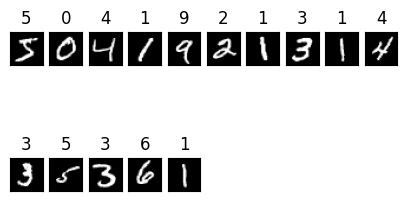

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
 ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
 ax.imshow(np.squeeze(x_train[i]),cmap='gray')
 ax.set_title(y_train[i])


In [ ]:
# determine the shape of the input image
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
# defining the model !!!
model = Sequential()

output_FirstConvLayer = Conv2D(32,(3,3), activation='relu', input_shape=img_shape)
model.add(output_FirstConvLayer)
model.add(MaxPool2D((2,2)))
output_SecondConvLayer = Conv2D(48, (3,3), activation='relu')
model.add(output_SecondConvLayer)
model.add(MaxPool2D((2,2)))
model.add(Dropout(0,5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
output_Layer = Dense(10, activation='softmax')
model.add(output_Layer)

input_Layer = model.inputs

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

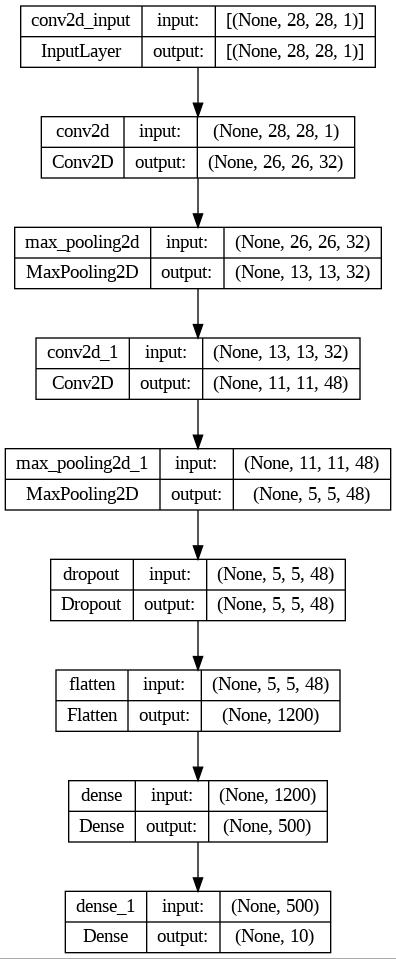

In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

In [ ]:
for layer in model.layers:
 # check for convolutional layer
 if 'conv' not in layer.name:
  continue
 # get filter weights
 filters, biases = layer.get_weights()
 print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 48)


conv2d (3, 3, 1, 32)
PRE-TRAINING: these are the 32 filters of the first convolution layer


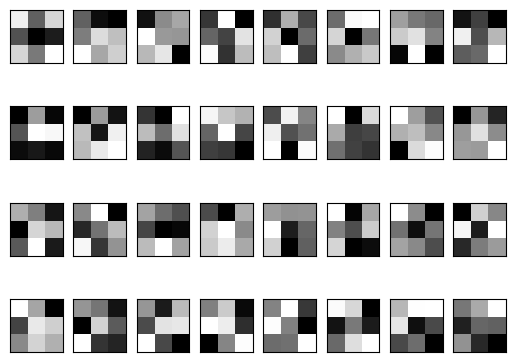

In [ ]:
# Get the convolution matrices from 1st convolution
filters0, biases0 = model.layers[0].get_weights()
print(model.layers[0].name, filters0.shape)

# normalize filter values to 0-1 so we can visualize them well
f_min0, f_max0 = filters0.min(), filters0.max()
filters0 = (filters0 - f_min0) / (f_max0 - f_min0)

# describe what we are seeing
print("PRE-TRAINING: these are the 32 filters of the first convolution layer")

# plot first all convolution filters of the first convolution layer
n_filters, ix = 32, 1
h_range, v_range = 8, 4
for i in range(v_range):
 for j in range(h_range):
  # get the filter
  f = filters0[:, :, :, h_range*i+j]
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter in grayscale
  pyplot.imshow(f, cmap='gray')
  ix += 1
# show the figure
pyplot.show()

conv2d_1 (3, 3, 32, 48)
PRE-TRAINING: these are the 32 filters of the first (out of 48) feature extraction
happening at convolution layer 2


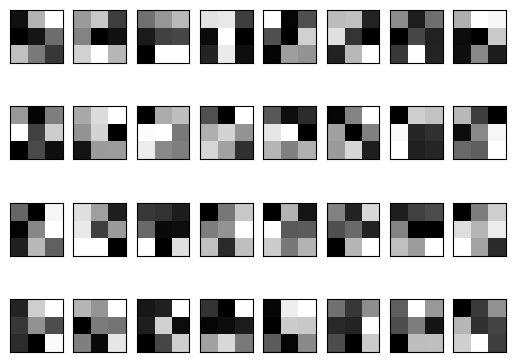

In [ ]:
# Get the convolution matrices from 2nd convolution
filters2, biases2 = model.layers[2].get_weights()
print(model.layers[2].name, filters2.shape)

# normalize filter values to 0-1 so we can visualize them well
f_min2, f_max2 = filters2.min(), filters2.max()
filters2 = (filters2 - f_min2) / (f_max2 - f_min2)

# describe what we are seeing
print("PRE-TRAINING: these are the 32 filters of the first (out of 48) feature extraction")
print("happening at convolution layer 2")

# plot first all convolution filters of the first convolution layer
n_filters, ix = 32, 1
h_range, v_range = 8, 4
for i in range(v_range):
 for j in range(h_range):
  # get the filter
  f = filters2[:, :, h_range*i+j, 1]
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter in grayscale
  pyplot.imshow(f, cmap='gray')
  ix += 1
# show the figure
pyplot.show()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.1)

Epoch 1/15
1688/1688 - 53s - loss: 0.4586 - accuracy: 0.9531 - val_loss: 0.0680 - val_accuracy: 0.9818 - 53s/epoch - 31ms/step
Epoch 2/15
1688/1688 - 50s - loss: 0.0629 - accuracy: 0.9815 - val_loss: 0.0791 - val_accuracy: 0.9778 - 50s/epoch - 30ms/step
Epoch 3/15
1688/1688 - 51s - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0826 - val_accuracy: 0.9763 - 51s/epoch - 30ms/step
Epoch 4/15
1688/1688 - 52s - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0541 - val_accuracy: 0.9842 - 52s/epoch - 31ms/step
Epoch 5/15
1688/1688 - 54s - loss: 0.0365 - accuracy: 0.9893 - val_loss: 0.0593 - val_accuracy: 0.9877 - 54s/epoch - 32ms/step
Epoch 6/15
1688/1688 - 51s - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0499 - val_accuracy: 0.9870 - 51s/epoch - 30ms/step
Epoch 7/15
1688/1688 - 50s - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0596 - val_accuracy: 0.9868 - 50s/epoch - 30ms/step
Epoch 8/15
1688/1688 - 51s - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0607 - val_accuracy: 0.9872 - 51s/ep

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.25000166893005


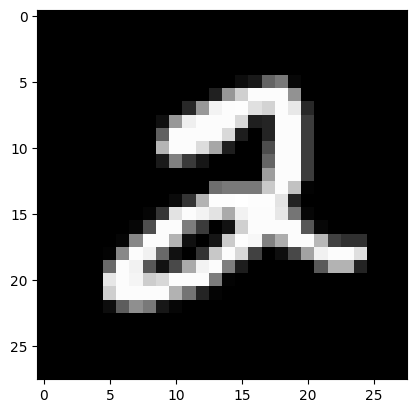

In [ ]:
image = x_train[5]
# let's display the image we want to predict
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [ ]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print("predicted: {}", format(argmax(p)))

1/1 [==============================] - 0s 193ms/step
predicted: {} 2


In [ ]:
# summarize filter shapes
for layer in model.layers:
 # check for convolutional layer
 if 'conv' not in layer.name:
  continue
 # get filter weights
 filters, biases = layer.get_weights()
 print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 48)


conv2d (3, 3, 1, 32)
POST-TRAINING: these are the 32 filters of the first convolution layer


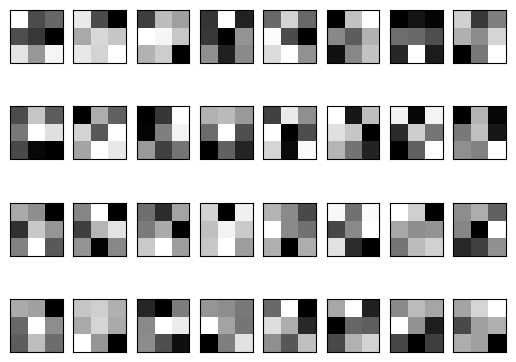

In [ ]:
# Get the convolution matrices from 1st convolution
filters0, biases0 = model.layers[0].get_weights()
print(model.layers[0].name, filters0.shape)

# normalize filter values to 0-1 so we can visualize them well
f_min0, f_max0 = filters0.min(), filters0.max()
filters0 = (filters0 - f_min0) / (f_max0 - f_min0)

# describe what we are seeing
print("POST-TRAINING: these are the 32 filters of the first convolution layer")

# plot first all convolution filters of the first convolution layer
n_filters, ix = 32, 1
h_range, v_range = 8, 4
for i in range(v_range):
 for j in range(h_range):
  # get the filter
  f = filters0[:, :, :, h_range*i+j]
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter in grayscale
  pyplot.imshow(f, cmap='gray')
  ix += 1
# show the figure
pyplot.show()

... now you have to put your 10 digit images in content folder... these images have to be labelled digit_x.png, in an 28x28 resolution

POST-TRAINING: After importing png test files, before printing Feature Maps, let's test our Model!
1/1 [==============================] - 0s 105ms/step
5


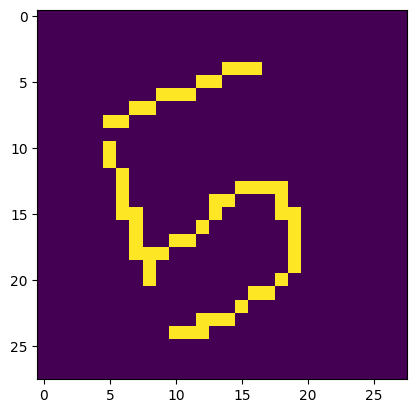

In [ ]:
# describe what we are seeing
print("POST-TRAINING: After importing png test files, before printing Feature Maps, let's test our Model!")

import cv2
image = cv2.imread('digit_5.png')[:,:,0]
image = np.invert(np.array([image]))
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

If we were using VGG, here is how our Feature Maps would look like
553467096/553467096 [==============================] - 7s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 68ms/step


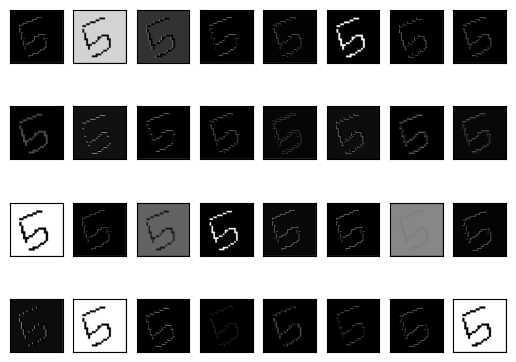

In [ ]:
# describe what we are seeing
print("If we were using VGG, here is how our Feature Maps would look like")

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from numpy import expand_dims

# load the model
model_FeatureMapViz = VGG16()
# redefine model to output right after the first hidden layer
model_FeatureMapViz = Model(inputs=model_FeatureMapViz.inputs, outputs=model_FeatureMapViz.layers[1].output)
model_FeatureMapViz.summary()
# load the image with the required shape
img = load_img('digit_5.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model_FeatureMapViz.predict(img)

# plot all 64 maps in an 8x8 squares
h_range, v_range = 8, 4
ix = 1
for _ in range(v_range):
 for _ in range(h_range):
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

.. but we are not VGG, we use a Sequential model
POST-TRAINING: Now that we have tested our model, looked at the 32 Feature Extractors
of the first convolution layer, let's look at what Feature Maps look like!
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 59ms/step


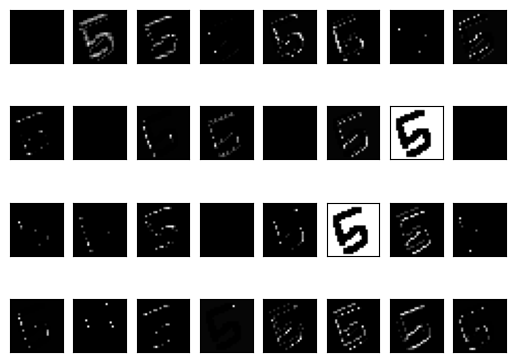

In [ ]:
# describe what we are seeing
print(".. but we are not VGG, we use a Sequential model")
print("POST-TRAINING: Now that we have tested our model, looked at the 32 Feature Extractors")
print("of the first convolution layer, let's look at what Feature Maps look like!")

# reusing defined layers !!!
# input_Layer
# output_FirstConvLayer
# output_SecondConvLayer
# output_Layer

# redefine model to output right after the first hidden layer
# model_FeatureMapViz = Model(inputs=model.inputs, outputs=model.layers[0].output)
model_FeatureMapViz = Model(inputs=model.inputs, outputs=output_FirstConvLayer.output)
model_FeatureMapViz.summary()

image = cv2.imread('digit_5.png')[:,:,0]
image = np.invert(np.array([image]))
feature_maps = model_FeatureMapViz.predict(image)

# plot all 32 maps in an 8x8 squares
h_range, v_range = 8, 4
ix = 1
for _ in range(v_range):
 for _ in range(h_range):
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

conv2d_1 (3, 3, 32, 48)
POST-TRAINING: these are the 32 filters of the first (out of 48) feature extraction
happening at convolution layer 2


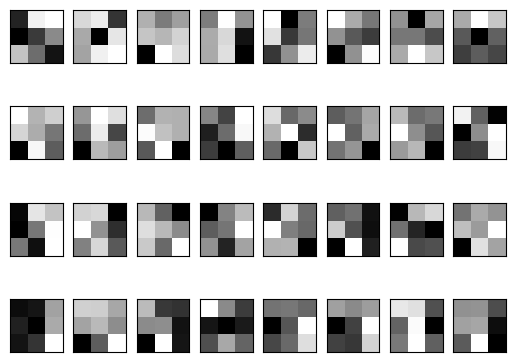

In [ ]:
# Get the convolution matrices from 2nd convolution
filters2, biases2 = model.layers[2].get_weights()
print(model.layers[2].name, filters2.shape)

# normalize filter values to 0-1 so we can visualize them well
f_min2, f_max2 = filters2.min(), filters2.max()
filters2 = (filters2 - f_min2) / (f_max2 - f_min2)

# describe what we are seeing
print("POST-TRAINING: these are the 32 filters of the first (out of 48) feature extraction")
print("happening at convolution layer 2")

# plot first all convolution filters of the first convolution layer
n_filters, ix = 32, 1
h_range, v_range = 8, 4
for i in range(v_range):
 for j in range(h_range):
  # get the filter
  f = filters2[:, :, h_range*i+j, 1]
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter in grayscale
  pyplot.imshow(f, cmap='gray')
  ix += 1
# show the figure
pyplot.show()

POST-TRAINING: Now let's look at the 48 FEature Maps
 at the output of the second convolution layer!
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
Total params: 14192 (55.44 KB)
Trainable params: 14192 (55.44 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________________________________

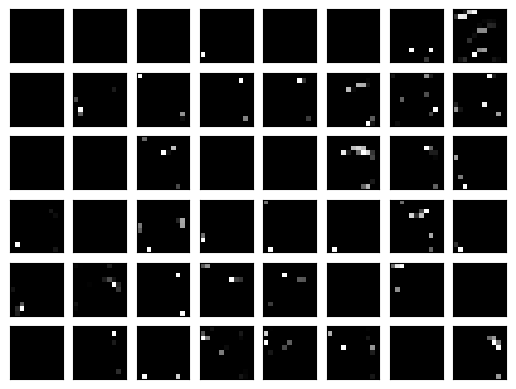

In [ ]:
# describe what we are seeing
print("POST-TRAINING: Now let's look at the 48 FEature Maps")
print(" at the output of the second convolution layer!")

# reusing defined layers !!!
# input_Layer
# output_FirstConvLayer
# output_SecondConvLayer
# output_Layer

# redefine model to output right after the first hidden layer
model_FeatureMapViz = Model(inputs=model.inputs, outputs=output_SecondConvLayer.output)
model_FeatureMapViz.summary()

image = cv2.imread('digit_5.png')[:,:,0]
image = np.invert(np.array([image]))
feature_maps = model_FeatureMapViz.predict(image)

# plot all 48 maps
h_range, v_range = 8, 6
ix = 1
for _ in range(v_range):
 for _ in range(h_range):
  # specify subplot and turn of axis
  ax = pyplot.subplot(v_range, h_range, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

In [ ]:
# for visualizing Features Maps / Activation Maps
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/